In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [3]:
dataset_path = '/content/drive/MyDrive/datasets/5Animals'

# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(4096, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [11]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=20)

Epoch 1/20
33/33 [==============================] - 874s 26s/step - loss: 1.6279 - accuracy: 0.2073 - val_loss: 1.5909 - val_accuracy: 0.2412
Epoch 2/20
33/33 [==============================] - 32s 974ms/step - loss: 1.5120 - accuracy: 0.3340 - val_loss: 1.7623 - val_accuracy: 0.2451
Epoch 3/20
33/33 [==============================] - 32s 956ms/step - loss: 1.5422 - accuracy: 0.3109 - val_loss: 1.4369 - val_accuracy: 0.3502
Epoch 4/20
33/33 [==============================] - 32s 986ms/step - loss: 1.3809 - accuracy: 0.3868 - val_loss: 1.3761 - val_accuracy: 0.3658
Epoch 5/20
33/33 [==============================] - 31s 955ms/step - loss: 1.2953 - accuracy: 0.4203 - val_loss: 1.3469 - val_accuracy: 0.4163
Epoch 6/20
33/33 [==============================] - 33s 995ms/step - loss: 1.2094 - accuracy: 0.4635 - val_loss: 1.3486 - val_accuracy: 0.4553
Epoch 7/20
33/33 [==============================] - 32s 988ms/step - loss: 1.2002 - accuracy: 0.4741 - val_loss: 1.2051 - val_accuracy: 0.4630


In [12]:
model.save('5animal_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
Y_pred = []
Y_vall = []

for i in range(9):
  for label in model.predict(dataset_validation[i][0]):
    Y_pred.append(np.argmax(label))
  for label in dataset_validation[i][1]:
    Y_vall.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_vall = np.array(Y_vall)

1/1 [==============================] - 0s 75ms/step


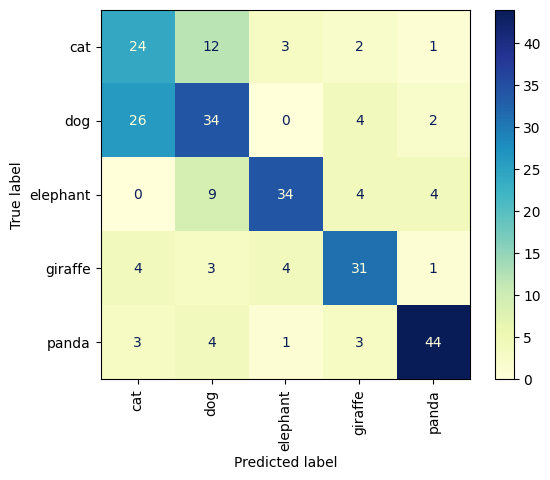

In [18]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=dataset_validation.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()

In [ ]:
import cv2

In [ ]:
img = cv2.imread('pics/giraffe.jpg')
img = cv2.resize(img, (224,224))
img = np.array(img)/255
img = np.expand_dims(img, axis=0)

output = model.predict(img)
output = np.argmax(output)

animals = ['cat', 'dog', 'elephant', 'giraffe', 'panda']
animal = animals[output]
print(animal)

1/1 [==============================] - 0s 75ms/step
giraffe
